# Principal Component Analysis - PCA - Dimensionality Reduction

Let's try to reduce the dimension of some 300 dimension word embedding to be able to perform a visualization!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

## What is PCA?

PCA is a dimensionsionality reduction technique which **main goal** is to **identify patterns in data**.

It tries to detect **correlation between variables**. If a strong correlation exists, the attemp to reduce the dimensionality makes sense.

**What's the idea behind PCA?**

PCA works trying to **maximize the variance** of the data. It's unsupervised.

## How does it work?

1. **Standardize** the data
2. **Obtain** the **Eigenvectors and Eigenvalues** from the **covariance matrix** or **correlation matrix**, or perform Singular Vector Decomposition
3. **Sort eigenvalues** in descending order and **choose the k** eigenvectors that correspond to the k **largest eigenvalues**
4. Construct the **projection matrix** *W* from the selected k eigenvectors
5. **Transform the original dataset** *X* via *W* to obtain a k-dimensional feature subspace Y

## The data

As mentioned before, we are going to use some Word2Vec word embeddings. Originally has 300 dimension and we are going to reduce that to k=2 dimensions. 

First, read the data

In [2]:
df = pd.read_csv('som_got_embedding_lookup.txt',header=-1,sep=' ')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Columns: 301 entries, 0 to 300
dtypes: float64(300), object(1)
memory usage: 2.3+ MB


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,Meera,-0.092121,0.104701,-0.041936,-0.006535,0.100802,-0.026256,-0.012895,0.055837,-0.012702,...,0.033146,0.041805,0.106177,-0.044814,0.043557,0.081989,-0.016194,0.042059,-0.053656,0.059873
1,days,-0.070485,-0.068735,-0.005541,0.008050,-0.025907,-0.056747,-0.025725,0.061224,0.050998,...,0.007330,0.034866,0.092918,0.090155,-0.022975,-0.028615,-0.001761,-0.096032,0.005933,-0.040342
2,cannot,0.051452,0.024792,0.042264,-0.093735,0.003651,-0.011852,0.000802,-0.089121,0.044036,...,-0.009870,-0.087178,0.061320,-0.028528,-0.013945,-0.053733,0.039426,0.031200,0.082319,0.059307


In [3]:
print('Dataset with %d words represented by vectors of %d elements (%d dimension)' 
      %(len(df.index),len(df.columns)-1,len(df.columns)-1))

Dataset with 996 words represented by vectors of 300 elements (300 dimension)


In [4]:
x_data = df.iloc[:,1:].as_matrix() #Just the vectors, without the word itself, in a numpy array
x_data[0,:5]

array([-0.0921205 ,  0.104701  , -0.0419364 , -0.00653504,  0.100802  ])

## PCA Step by Step

### 1. Standardize data

Our data was already normalized data, that will work perfectly but, in any case...

In [5]:
x_data_std = StandardScaler().fit_transform(x_data)
x_data_std[0,:5]

array([-1.58732198,  1.73902447, -0.7499844 , -0.05512676,  1.79748477])

### 2. Obtain Eigenvector and Eigenvalues

From Covariance Matrix

#### Compute Covariance Matrix

In [6]:
mean_vec = np.mean(x_data_std,axis=0)
print('The mean vector for all words, with same dimension, shape:', mean_vec.shape)

cov_mat = (x_data_std - mean_vec).T.dot((x_data_std - mean_vec)) / (x_data_std.shape[0]-1)
print('Covariance matrix shape:',cov_mat.shape)
print('Covariance matrix:\n%s' % cov_mat)

The mean vector for all words, with same dimension, shape: (300,)
Covariance matrix shape: (300, 300)
Covariance matrix:
[[ 1.00100503 -0.05016286 -0.02445909 ...,  0.01811355  0.00317948
   0.03538871]
 [-0.05016286  1.00100503 -0.01342924 ..., -0.02733237 -0.01148505
  -0.02037689]
 [-0.02445909 -0.01342924  1.00100503 ...,  0.03390192 -0.01676207
  -0.01703914]
 ..., 
 [ 0.01811355 -0.02733237  0.03390192 ...,  1.00100503  0.01918628
  -0.02853517]
 [ 0.00317948 -0.01148505 -0.01676207 ...,  0.01918628  1.00100503
  -0.04877486]
 [ 0.03538871 -0.02037689 -0.01703914 ..., -0.02853517 -0.04877486
   1.00100503]]


#### Obtain Eigenvectors and Eigenvalues from Covariance Matrix

In [7]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print('Eigen vectors shape:',eigen_vectors.shape)
print('Eigen vectors:\n%s\n' % eigen_vectors)
print('Eigen values shape:',eigen_values.shape)
print('Eigen values:\n%s ...' % eigen_values[:5])

Eigen vectors shape: (300, 300)
Eigen vectors:
[[-0.02993423  0.02228339  0.04214132 ..., -0.03363742  0.00748178
  -0.00109429]
 [ 0.00660863 -0.11609161 -0.11832278 ..., -0.03102873 -0.00511627
   0.06410923]
 [ 0.11785346 -0.03386838 -0.02068208 ..., -0.04936719 -0.04571345
  -0.00563506]
 ..., 
 [ 0.03678106  0.11393329 -0.02276347 ..., -0.0508258  -0.06398254
   0.13181266]
 [ 0.01844588  0.0555996   0.0062924  ...,  0.05307785 -0.02787843
   0.06661061]
 [ 0.0133461   0.03654808 -0.03671755 ...,  0.065186    0.02056725
   0.02134419]]

Eigen values shape: (300,)
Eigen values:
[ 2.3736853   2.31974915  2.28801478  2.23548573  2.224948  ] ...


### 3. Sort eigenvalues

Which eigenvectors can be dropped without losing too much information? We need to inspect the eigenvalues.

**Key:** The **eigenvectors** with the **lowest eigenvalues** bear the **least information** about the distribution of the data => Drop them!

In [8]:
# Make a list of (eigenvalues,eigenvector) tuples
eig_pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('First pair: ',eig_pairs[0][0],eig_pairs[0][1][:5],'...')

#Sort by eigenvalue in descending order
eig_pairs.sort(key=lambda x:x[0], reverse=True)
print('First sorted pair: ',eig_pairs[0][0],eig_pairs[0][1][:5],'...\n')

#Okay, that was sorted before but let's confirm...
print('First 10 Eigenvalues in descending order:')
for i in range(10):
    print(eig_pairs[i][0])

First pair:  2.37368529718 [-0.02993423  0.00660863  0.11785346  0.05575781  0.04455407] ...
First sorted pair:  2.37368529718 [-0.02993423  0.00660863  0.11785346  0.05575781  0.04455407] ...

First 10 Eigenvalues in descending order:
2.37368529718
2.31974915306
2.28801478199
2.2354857313
2.22494800332
2.20698172014
2.18089259978
2.1481095467
2.13045474962
2.10592273826


### 4. Construct projection matrix

With it, we are going to be able to transform the original word embeddings onto the new feature subspace of 2 dims.

Although the fancy name, it's just the "top 2" eigenvectors with the highest eigenvalues.

In [14]:
projection_matrix = np.hstack((eig_pairs[0][1].reshape(300,1),
                             eig_pairs[1][1].reshape(300,1)))

print('Projection matrix shape:' , projection_matrix.shape)
print('Projection matrix:\n%s' % projection_matrix)

Projection matrix shape: (300, 2)
Projection matrix:
[[ -2.99342331e-02   2.22833905e-02]
 [  6.60863257e-03  -1.16091612e-01]
 [  1.17853462e-01  -3.38683771e-02]
 [  5.57578085e-02   5.52953956e-02]
 [  4.45540737e-02   3.79311844e-02]
 [ -3.38676387e-02  -6.22359945e-02]
 [  8.68608266e-02   2.33203459e-02]
 [  2.61087951e-02   9.31122166e-02]
 [ -4.91940035e-03   3.21084157e-02]
 [  8.83194597e-02  -5.15145785e-02]
 [ -7.52671320e-02   2.63872738e-02]
 [  4.38839527e-03   3.96915289e-02]
 [  9.81575636e-02  -4.60453747e-02]
 [  1.14270474e-01   1.25929756e-01]
 [ -5.79763633e-02   2.80563530e-02]
 [ -5.14118286e-02  -5.85714100e-02]
 [ -1.15250368e-01  -1.29197252e-01]
 [  9.37647210e-03   1.00640246e-01]
 [ -6.84219967e-02   1.11476184e-01]
 [ -4.93583045e-03  -9.76853865e-02]
 [ -4.05898126e-03   6.16543424e-02]
 [ -2.57451087e-02   5.54773512e-02]
 [ -1.30887016e-02   3.88940112e-02]
 [  1.00315505e-03   6.05105163e-02]
 [ -3.26540623e-02   3.12240823e-02]
 [ -6.09992826e-02  -1

### 5. Transform the original dataset via the Projection Matrix

*new_dataset = original_dataset x projection_matrix*

In [15]:
dimen_reduced_data = x_data_std.dot(projection_matrix)
print('The 3 first word with 2D embedding:\n%s' % dimen_reduced_data[:3,:])

The 3 first word with 2D embedding:
[[-1.598381   -0.30022624]
 [ 3.16452222 -0.30803196]
 [-0.17446193  0.22400168]]


And that's it

---

### Via sklearn for testing

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca_with_sklearn = pca.fit_transform(x_data_std)

## But now we can PLOT!

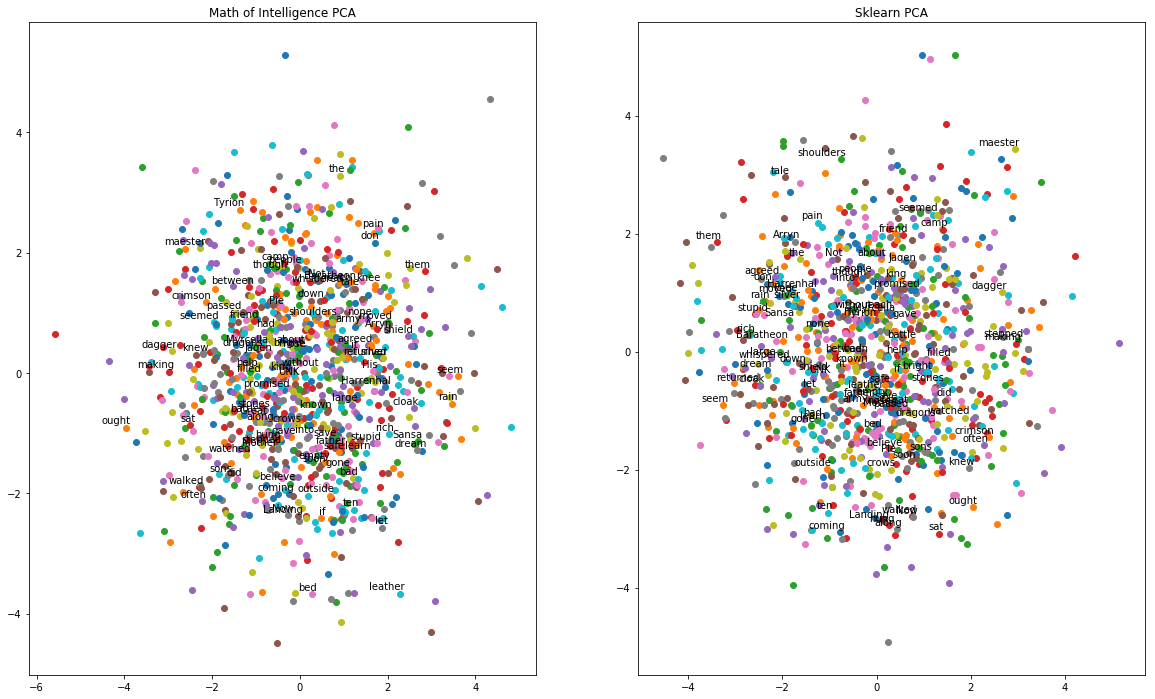

In [24]:
labels = df.iloc[:,0] #Store the word itself

fig,axes = plt.subplots(1,2,figsize=(20,12))
axes[0].set_title('Math of Intelligence PCA')
axes[1].set_title('Sklearn PCA')
for i,label in enumerate(labels):
    maybe_anotate = np.random.rand()
    
    xMath,yMath = dimen_reduced_data[i,:] #Our reduced data!!
    xSklearn,ySkLearn = data_pca_with_sklearn[i,:] #Sklearn reduced data
    
    axes[0].scatter(xMath,yMath)
    axes[1].scatter(xSklearn,ySkLearn)
    
    if(maybe_anotate < 0.1):
        axes[0].annotate(label,xy=(xMath,yMath),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
        axes[1].annotate(label,xy=(xSklearn,ySkLearn),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
    
plt.show()

## References

<a href="https://www.youtube.com/watch?v=jPmV3j1dAv4&ab_channel=SirajRaval">The Math of Intelligence #5 - Dimensionality Reduction</a>